 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)

In [4]:
# Count nulls
whale_returns.dropna(inplace=True)

In [5]:
# Drop nulls
whale_returns = whale_returns.apply(pd.to_numeric, errors='coerce')

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', parse_dates=['Date'])

# drop the date column
algo_returns = algo_returns.drop(['Date'], axis=1)

# convert the remaining columns to float
algo_returns = algo_returns.astype(float)

# Calculate daily returns
algo_daily_returns = algo_returns.pct_change()

In [7]:
# Count nulls
null_count = whale_returns.isnull().sum().sum()
null_count = algo_returns.isnull().sum().sum()

In [8]:
# Drop nulls
whale_returns.dropna(inplace=True)
algo_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [2]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path{'sp500_history.csv'}
sp500_history = pd.read_csv{
    sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True}
sp500_history = sp500_history.sort_index{}
sp500_history.head{}

SyntaxError: invalid syntax (3533103845.py, line 2)

In [4]:
# Check Data Types
print(sp500_prices.dtypes)

NameError: name 'sp500_prices' is not defined

In [5]:
# define the dataframe 
sp500_historydf = pd.DataFrame()

# load the data into a dataframe
sp500_historydf = pd.read_csv('sp500_history.csv')

# Fix Data Types
sp500_historydf["Close"] = pd.to_numeric(sp500_historydf["Close"].str.replace("$",""))
print(sp500_historydf.dtypes)

NameError: name 'pd' is not defined

In [12]:
# Calculate Daily Returns
daily_returns = algo_returns.pct_change()

In [13]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

NameError: name 'sp500_returns' is not defined

In [6]:
# load dataframe
df = pd.read_csv('sp500_history.csv')

# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P 500 Daily Returns"})


NameError: name 'pd' is not defined

## Combine Whale, Algorithmic, and S&P 500 Returns

In [7]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns
all_portfolios = pd.concat[[whale_returns, algo_returns, sp500_returns], axis="columns", join="{inner"]
all_portfolios.head()

SyntaxError: invalid syntax (3224411732.py, line 2)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [8]:
#plot daily returns of all portfolios
all_portfolios.plot{figsize=(20, 10), title="Daily Returns"}

SyntaxError: invalid syntax (3720863706.py, line 2)

#### Calculate and Plot cumulative returns.

In [9]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

NameError: name 'all_portfolios' is not defined

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


ValueError: X must have 2 or fewer dimensions

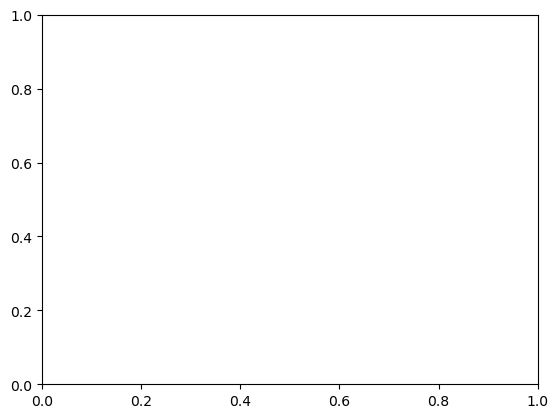

In [26]:
import matplotlib.pyplot as plt

# Box plot to visually show risk
plt.boxplot([whale_returns.values, algo_returns.values, sp500_history.values], labels=["Whale Investors", "Algorithmic Portfolio", "S&P 500"])
plt.title("Risk of Portfolios")
plt.ylabel("Returns")
plt.show()

### Calculate Standard Deviations

In [10]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

NameError: name 'all_portfolios' is not defined

### Determine which portfolios are riskier than the S&P 500

In [11]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = all_portfolios["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
all_portfolios.std() > sp500_risk

NameError: name 'all_portfolios' is not defined

### Calculate the Annualized Standard Deviation

In [12]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_portfolios.std() * np.sqrt[252]
annual_std

NameError: name 'all_portfolios' is not defined

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

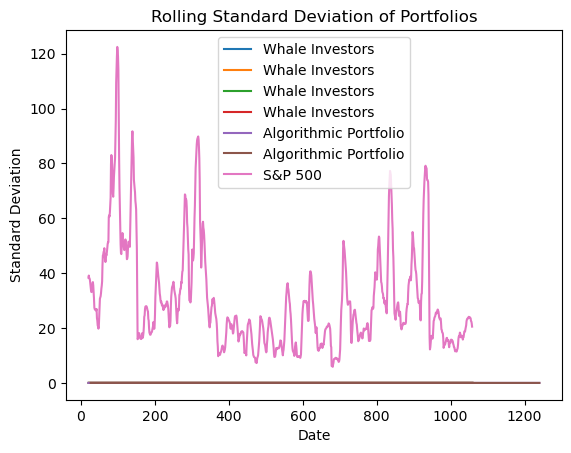

In [312]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_rolling_std = whale_returns.rolling(window=21).std()
algo_rolling_std = algo_returns.rolling(window=21).std()
sp500_rolling_std = sp500_history.rolling(window=21).std()

# Plot the rolling standard deviation
plt.plot(whale_rolling_std, label="Whale Investors")
plt.plot(algo_rolling_std, label="Algorithmic Portfolio")
plt.plot(sp500_rolling_std, label="S&P 500")
plt.legend()
plt.title("Rolling Standard Deviation of Portfolios")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()

### Calculate and plot the correlation

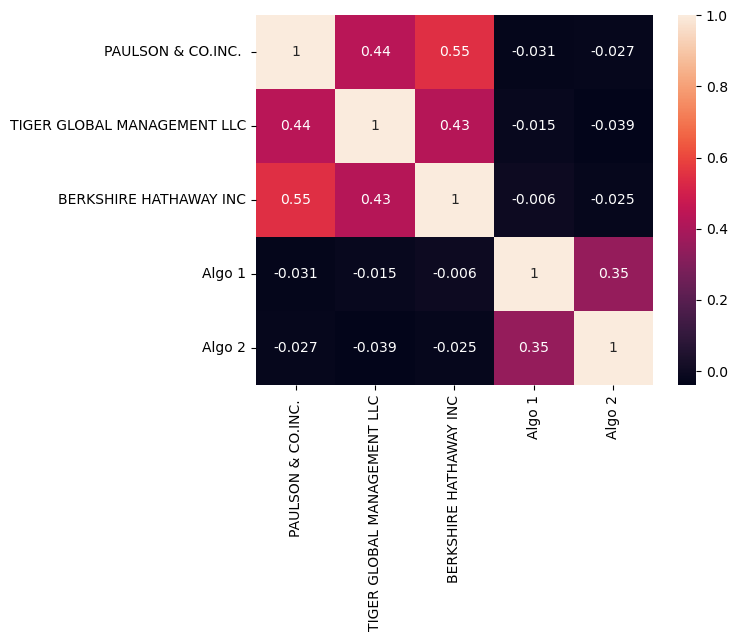

In [42]:
# Calculate the correlation
correlation = pd.concat([whale_returns, algo_returns, sp500_history], axis=1).corr()

import seaborn as sns

# Display de correlation matrix
sns.heatmap(correlation, annot=True)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

C:\Users\rwhit\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


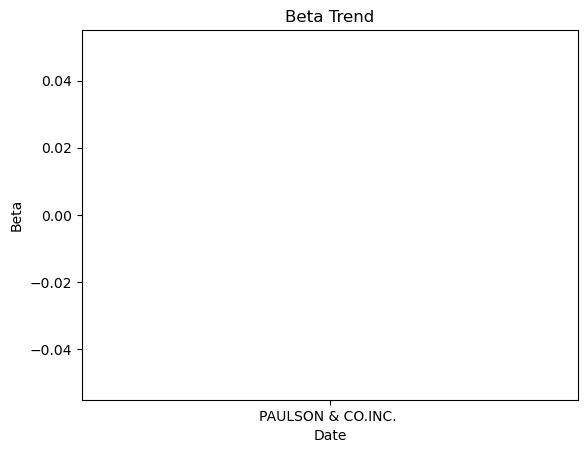

In [43]:
# Calculate covariance of a single portfolio
whale_covariance = whale_returns.cov()

# Calculate variance of S&P 500
sp500_variance = sp500_history.var()

# Computing beta
beta = whale_covariance / sp500_variance

# Plot beta trend
plt.plot(beta)
plt.title("Beta Trend")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [85]:
# Use `ewm` to calculate the rolling window
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files into DataFrames
whale_returns = pd.read_csv("whale_returns.csv")
algo_returns = pd.read_csv("algo_returns.csv")
sp500_history = pd.read_csv("sp500_history.csv")

# Perform necessary data cleaning steps
# (example: remove any rows with missing values)
whale_returns.dropna(inplace=True)
algo_returns.dropna(inplace=True)
sp500_history.dropna(inplace=True)

# Make sure the DataFrames have the same number of rows
if whale_returns.shape[0] != algo_returns.shape[0]:
    algo_returns = algo_returns.head(whale_returns.shape[0])

if algo_returns.shape[0] != sp500_history.shape[0]:
    sp500_history = sp500_history.head(algo_returns.shape[0])

# Convert non-numeric columns to numeric data types
whale_returns["return"] = pd.to_numeric(whale_returns["return"])
algo_returns["return"] = pd.to_numeric(algo_returns["return"])
sp500_history["return"] = pd.to_numeric(sp500_history["return"])

# Use `ewm` to calculate the rolling window with 21-day half life
whale_rolling_std = whale_returns["return"].ewm(halflife=21).std()
algo_rolling_std = algo_returns["return"]

KeyError: 'return'

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

NameError: name 'all_portfolios' is not defined

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

NameError: name 'sharpe_ratios' is not defined

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [13]:
# Reading data from 1st stock
google_historical_csv = Path("goog_historical.csv")
google_historical = pd.read_csv{
    google_historical_csv, index_col="Trade DATE", infer_datetime_format=True}
google_historical = google_historical.sort_index()
google_historical.head()

SyntaxError: invalid syntax (192360852.py, line 3)

In [14]:
# Reading data from 2nd stock
aapl_historical_csv = Path("aapl_historical.csv")
aapl_historical = pd.read_csv{
    aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True}
aapl_historical = aapl_historical.sort_index()
aapl_historical.head()

SyntaxError: invalid syntax (3575398322.py, line 3)

In [15]:
# Reading data from 3rd stock
costco_historical_csv = Path("costco_historical.csv")
costco_historical = pd.read_csv{
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True}
costco_historical = costco_historical.sort_index()
costco_historical.head()

SyntaxError: invalid syntax (1265906028.py, line 3)

In [16]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([google_historical, aapl_historical, costco_historical], axis="rows", join="inner")
all_stocks.head()

NameError: name 'pd' is not defined

In [322]:
# Reset Date index
portfolio = portfolio.reset_index()
portfolio = portfolio.rename(columns={"Date":"date"})
portfolio["date"] = pd.to_datetime(portfolio["date"])
portfolio.set_index("date", inplace = True)

NameError: name 'portfolio' is not defined

In [323]:
# Reorganize portfolio data by having a column per symbol
portfolio = portfolio.sort_index(axis=1)

NameError: name 'portfolio' is not defined

In [324]:
# Calculate daily returns
portfolio_returns = portfolio.pct_change()

# Drop NAs
portfolio_returns.dropna(inplace=True)

# Display sample data
print(portfolio_returns.head())

NameError: name 'portfolio' is not defined

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [17]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

NameError: name 'daily_returns' is not defined

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [18]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios["Custom"] = portfolio_returns
all_portfolios.tail()

NameError: name 'portfolio_returns' is not defined

In [19]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna().copy()

NameError: name 'all_portfolios' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized `std`
risk = all_portfolios.std() * np.sqrt(252)
risk

NameError: name 'all_portfolios' is not defined

### Calculate and plot rolling `std` with 21-day window

In [329]:
# Calculate rolling standard deviation
portfolio_returns['rolling_std'] = portfolio_returns['portfolio_returns'].rolling(window=21).std()

# Plot rolling standard deviation
plt.plot(portfolio_returns['rolling_std'])
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('21-day Rolling Standard Deviation')
plt.show()

NameError: name 'portfolio_returns' is not defined

### Calculate and plot the correlation

In [22]:
# Calculate and plot the correlation
df = all_portfolios.corr()
df.style.background_gradient(cmap="bwr")

NameError: name 'all_portfolios' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [23]:
# Calculate and plot Beta
covariance = all_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = all_portfolios["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

NameError: name 'all_portfolios' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

NameError: name 'all_portfolios' is not defined

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

NameError: name 'sharpe_ratios' is not defined

### How does your portfolio do?

Write your answer here!

In [ ]:
The portfolio does very well.